<IPython.core.display.Javascript object>


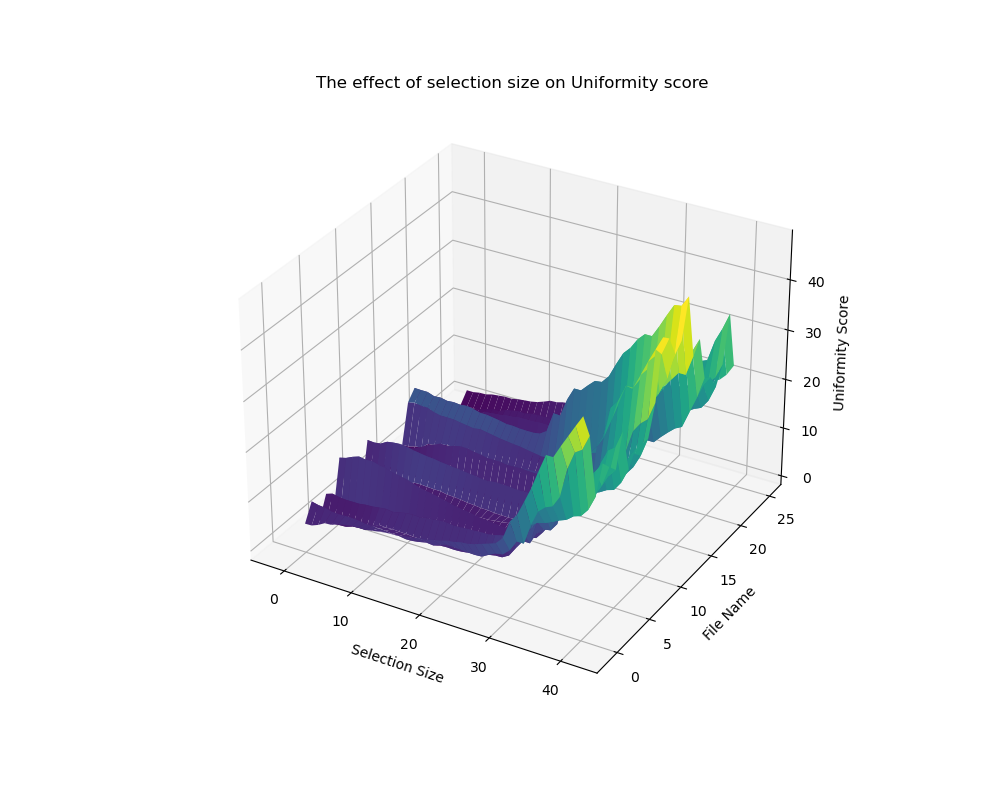

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib notebook

folder_path = "C:/Users/james/Desktop/Surface plasma/Uniformaty_data"  # Specify the folder path where CSV files are located

# Get a list of CSV file paths in the folder
csv_files = glob.glob(folder_path + "/*.csv")

# Initialize an empty list to store the individual DataFrames
dfs = []

# Read each CSV file and append its DataFrame to the list
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs)

merged_df = combined_df.groupby('File Name').sum()

# Reset the index to make the 'File Name' column a regular column
merged_df = merged_df.reset_index()

# Visualize the DataFrame in 3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x_axis = np.arange(len(merged_df.columns[1:]))
y_axis = np.arange(len(merged_df['File Name']))
X, Y = np.meshgrid(x_axis, y_axis)
Z = merged_df.iloc[:, 1:].values

surface = ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Selection Size')
ax.set_ylabel('File Name')
ax.set_zlabel('Uniformity Score')
ax.set_title('The effect of selection size on Uniformity score')

# Add interactive rotation
def update_plot(elev, azim):
    ax.view_init(elev=elev, azim=azim)

# Connect the update_plot function to the mouse event
fig.canvas.mpl_connect('motion_notify_event', lambda event: update_plot(event.ydata, event.xdata))

plt.show()
